# Final Project - NBA Shot Metrics 

This project will use NBA shot Metrics from every ten years from 2004 to determine if there is a common trend between Most Valuable Player (MVP) award winners. The goal is to determine if there is any way to predict who will win the MVP award and explain why they won over whoever the runner-up was. 

As over the years the NBA scoring methods have changed, this study will make sure to use multiple seasons to track this change of scoring to see if the MVP winning criteria has changed at all over the years. Three different MVP winners will be analzyed individually and then the results will be collected all together to determine if there are any trends that can be seen.



## Data Import

In [4]:
## Utalized pandas to import each year into its own dataframe
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import nsfg
import first

## Made that only the shots made are looked at when performing this study
shot_chart_2004 = pd.read_csv('NBA_2004_Shots.csv')
shot_2004 = shot_chart_2004[shot_chart_2004['EVENT_TYPE'] == 'Made Shot'] 
shot_chart_2014 = pd.read_csv('NBA_2014_Shots.csv') 
shot_2014 = shot_chart_2014[shot_chart_2014['EVENT_TYPE'] == 'Made Shot']
shot_chart_2024 = pd.read_csv('NBA_2024_Shots.csv') 
shot_2024 = shot_chart_2024[shot_chart_2024['EVENT_TYPE'] == 'Made Shot']

## Data Set Explanation

In [6]:
shot_2004.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
5,2004,2003-04,1610612747,Los Angeles Lakers,2567,Brian Cook,C,C,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,1,12
6,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Above the Break 3,Right Side Center,RC,24+ ft.,-15.8,23.15,23,6,1,25


In order to analzye the data sets, we first must understand what exactly is in this data set. There are multiple columns including information about where each player shot the specific shot and what game it occurred at. However, I will highlight the columns and variables that will be used in this study. The obvious variables that will be used are the Player_ID and Player_Name columns to isolate the specific MVP player that is going to be analzyed, and the Shot_Made column to figure out whether the player made the shot or not. The important variables that will be analzyed are the Action_Type, Shot_Type, Basic_Zone, Quarter, and Mins_Left. The Position_Group column will also be used as a comparison to other players performances in the same position to determine how much better the MVP was in their specific Position Group.

Using these five columns, various comparisons can be analzyed. The Action_Type column is used to explain the description of the shot type (layup, dunk, jump shot, etc.). The Shot_Type column is used to explain if the shot was a 2pt or 3pt shot. The Basic_Zone column is used to describe where the shot was taken from (In the Paint, Midrange, Left Corner 3, etc.). The Quarter and Mins_Left columns are used to describe when the player takes the shot at during the game. These metrics will be used to determine clutch baskets which are shots made during the last five minutes of the game. 

Now that the data set is understood, we can start performing our data analysis on a season by season case. 

# 2004 Season - MVP Kevin Garnett
#### Histogram and Descriptive Statistics

After the data has been imported, we will now go through year by year to analzye individually. Starting with the 2003-2004 season with the winner of the MVP award being Kevin Garnett this season. The way that the award is given is that a board of sportswriters and broadcasters vote for their top five choices. After all the votes are collected, the player with the most points will be deemed the Most Valuable Player of that season.

Therefore, it is important to note the difference of votes between first place and the runner up. The MVP winner Kevin Garnett received 1219 total points and the runner-up, Tim Duncan, received 716. Therefore, the point differential was 503 points so it can be assumed that the majority of voters decided that Kevin Garnett deserved the MVP award. 

Kevin Highest Shot Type Occurance : 0    Jump Shot
Name: ACTION_TYPE, dtype: object
Tim Highest Shot Type Occurance : 0    Layup Shot
Name: ACTION_TYPE, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

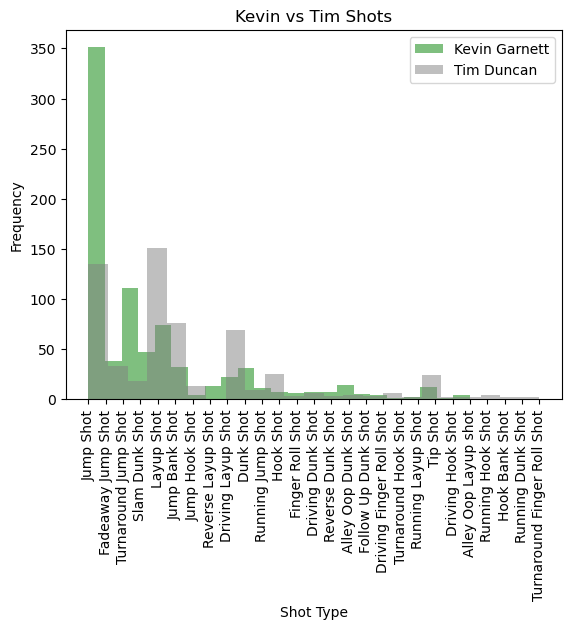

In [10]:
kevin_2004 = shot_2004[shot_2004['PLAYER_NAME'] == 'Kevin Garnett']
tim_2004 = shot_2004[shot_2004['PLAYER_NAME'] == 'Tim Duncan']

## Action_Type
import matplotlib.pyplot as plt
plt.hist(kevin_2004['ACTION_TYPE'], label = "Kevin Garnett", bins=23, color="green", alpha = 0.5)
plt.hist(tim_2004['ACTION_TYPE'], label = "Tim Duncan", bins=23, color="grey", alpha = 0.5)

print("Kevin Highest Shot Type Occurance :", kevin_2004['ACTION_TYPE'].mode())
print("Tim Highest Shot Type Occurance :", tim_2004['ACTION_TYPE'].mode())

plt.xticks(rotation=90)
plt.title('Kevin vs Tim Shots')
plt.xlabel('Shot Type')
plt.ylabel('Frequency')

plt.legend()
plt.show



Kevin Average Shot Distance (ft) : 9.5
Kevin Most Common Shot Distance (ft) : 0    0
Name: SHOT_DISTANCE, dtype: int64
Tim Average Shot Distance (ft) : 5.648648648648648
Tim Most Common Shot Distance (ft) : 0    0
Name: SHOT_DISTANCE, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

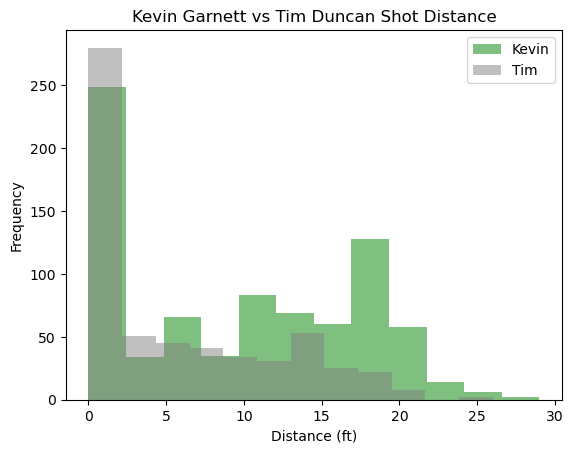

In [11]:
## Shot Distance

plt.hist(kevin_2004['SHOT_DISTANCE'], bins=12,label = "Kevin", alpha=0.5, color="green")
plt.hist(tim_2004['SHOT_DISTANCE'], bins=12,label = "Tim", alpha=0.5, color="grey")
print("Kevin Average Shot Distance (ft) :", kevin_2004['SHOT_DISTANCE'].mean())
print("Kevin Most Common Shot Distance (ft) :", kevin_2004['SHOT_DISTANCE'].mode())
print("Tim Average Shot Distance (ft) :", tim_2004['SHOT_DISTANCE'].mean())
print("Tim Most Common Shot Distance (ft) :", tim_2004['SHOT_DISTANCE'].mode())
plt.xticks(rotation=0)
plt.title('Kevin Garnett vs Tim Duncan Shot Distance')
plt.xlabel('Distance (ft)')
plt.ylabel('Frequency')
plt.legend()
plt.show


Kevin Most Common Shot Location : 0    Mid-Range
Name: BASIC_ZONE, dtype: object
Tim Most Common Shot Location : 0    Restricted Area
Name: BASIC_ZONE, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

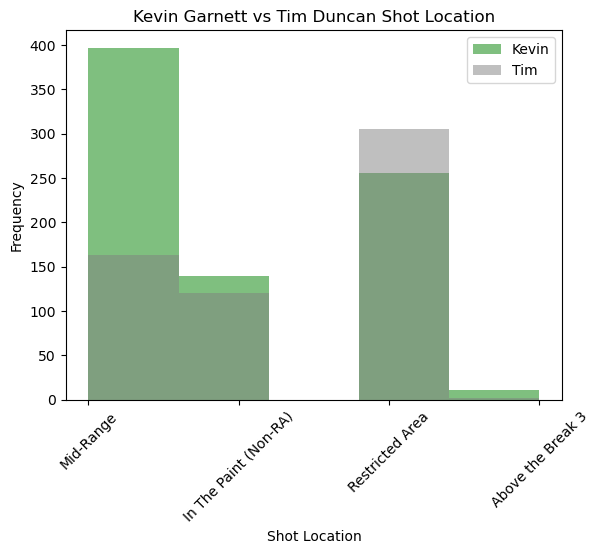

In [12]:
## Basic_Zone
plt.hist(kevin_2004['BASIC_ZONE'], bins=5,label = "Kevin", alpha = 0.5, color="green")
plt.hist(tim_2004['BASIC_ZONE'], bins=5,label = "Tim", alpha = 0.5, color="grey")
print("Kevin Most Common Shot Location :", kevin_2004['BASIC_ZONE'].mode())
print("Tim Most Common Shot Location :", tim_2004['BASIC_ZONE'].mode())
plt.xticks(rotation=45)
plt.title('Kevin Garnett vs Tim Duncan Shot Location')
plt.xlabel('Shot Location')
plt.ylabel('Frequency')
plt.legend()
plt.show


Kevin Most Shots in Quarter : 0    1
Name: QUARTER, dtype: int64
Tim Most Shots in Quarter : 0    1
Name: QUARTER, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

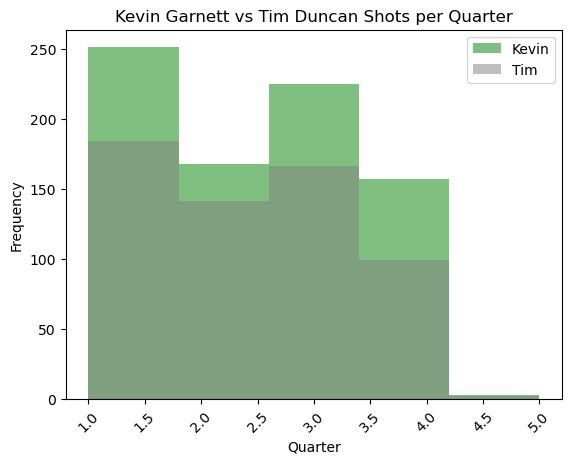

In [13]:
## Quarter
plt.hist(kevin_2004['QUARTER'], bins=5, label="Kevin", alpha=0.5, color="green")
plt.hist(tim_2004['QUARTER'], bins=5,label="Tim", alpha=0.5, color="grey")
print("Kevin Most Shots in Quarter :", kevin_2004['QUARTER'].mode())
print("Tim Most Shots in Quarter :", tim_2004['QUARTER'].mode())
plt.xticks(rotation=45)
plt.title('Kevin Garnett vs Tim Duncan Shots per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.show


Kevin Average Shot Made in Fourth Quarter : 2.3694029850746268
Tim Average Shot Made in Fourth Quarter : 2.314189189189189


<function matplotlib.pyplot.show(close=None, block=None)>

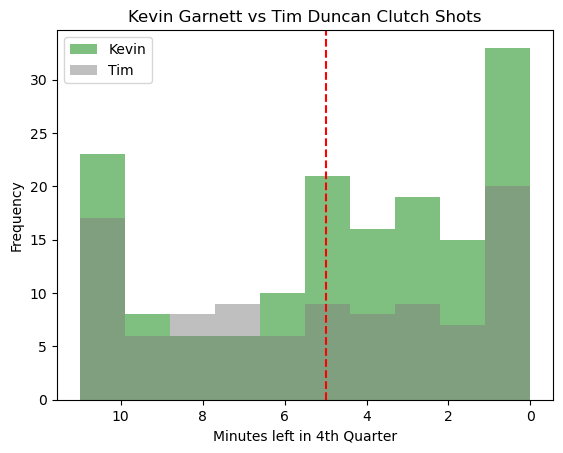

In [14]:
## Clutch Baskets
kevin_clutch = kevin_2004[(kevin_2004['QUARTER'] == 4)]
tim_clutch = tim_2004[(tim_2004['QUARTER'] == 4)]
plt.hist(kevin_clutch['MINS_LEFT'], bins = 10, color="green", alpha = 0.5, label = "Kevin")
plt.hist(tim_clutch['MINS_LEFT'], bins = 10, color="grey", alpha = 0.5, label = "Tim")
plt.gca().invert_xaxis()
print("Kevin Average Shot Made in Fourth Quarter :", kevin_2004['QUARTER'].mean())
print("Tim Average Shot Made in Fourth Quarter :", tim_2004['QUARTER'].mean())
plt.axvline(x=5, color='r', linestyle='--')
plt.title('Kevin Garnett vs Tim Duncan Clutch Shots')
plt.xlabel('Minutes left in 4th Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.show

### PMF Comparison
After analyzing all of this data and understanding the spread within different columns, we can now get to comparing the data from the MVP to NBA as a whole to see what the differences are.

<function matplotlib.pyplot.show(close=None, block=None)>

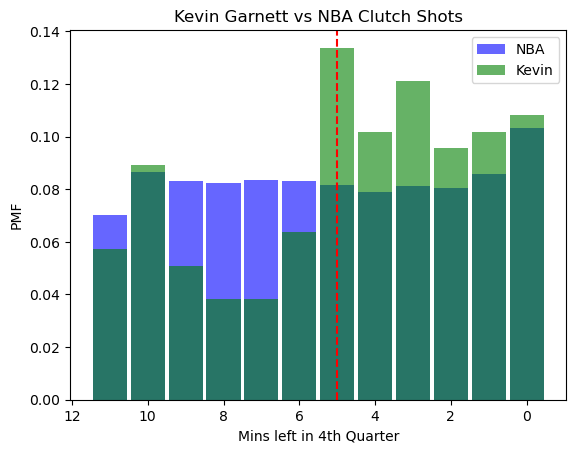

In [191]:
nba_clutch = shot_2004[(shot_2004['QUARTER'] == 4)]

nba_clutch_pmf = thinkstats2.Pmf(nba_clutch['MINS_LEFT'], label='NBA')
kevin_clutch_pmf = thinkstats2.Pmf(kevin_clutch['MINS_LEFT'], label = 'Kevin')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(nba_clutch_pmf, color = "blue")
thinkplot.Hist(kevin_clutch_pmf, color = "green")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="PMF")
plt.title('Kevin Garnett vs NBA Clutch Shots')
plt.legend()


plt.show

### CDF Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

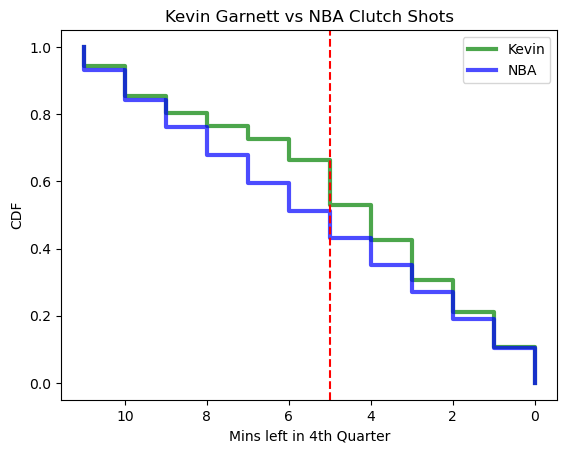

In [195]:
kevin_clutch_cdf = thinkstats2.Cdf(kevin_clutch['MINS_LEFT'], label = 'Kevin')
nba_clutch_pmf = thinkstats2.Cdf(nba_clutch['MINS_LEFT'], label = 'NBA')
thinkplot.Cdf(kevin_clutch_cdf, color = "green")
thinkplot.Cdf(nba_clutch_pmf, color = "blue")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="CDF")
plt.title('Kevin Garnett vs NBA Clutch Shots')
plt.legend()


plt.show

By evaluating both the CDF and PMF for the clutch points, it can be seen that there is a clear difference between the MVP winner Kevin Garnett and the rest of the NBA. Kevin Garnett is trusted more by his team during late game scenarios which has a lot more pressure. This could be a reason why the MVP was given to Kevin Garnett over all the other NBA players. 

### Analytical Distribution 
The goal of this section is to further analyze data using an analytical distribution. A normal probability plot will be created from the Quarter variable which will tell us how many standard deviations away the shots made in each quarter are from the mean. For context, there are four quarts in a game usually, however in some games when the score is tied after the completion of the fourth quarter, an extra quarter of play is played which is represented here by the 4.5 and 5.0 quarters.

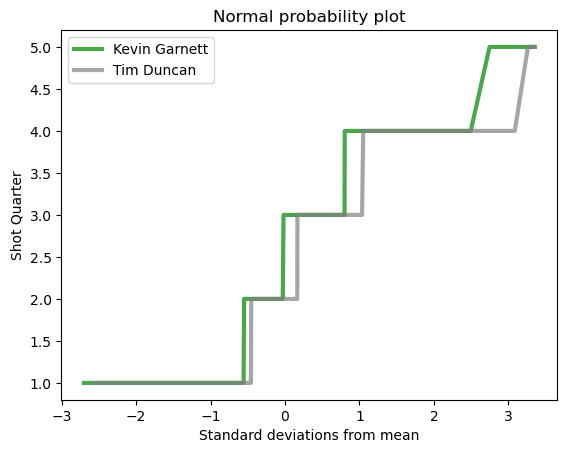

In [22]:
thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(kevin_2004['QUARTER'])
thinkplot.Plot(xs, ys, label="Kevin Garnett", color = 'green')

xs, ys = thinkstats2.NormalProbability(tim_2004['QUARTER'])
thinkplot.Plot(xs, ys, label="Tim Duncan", color = 'grey')

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Shot Quarter",
)


This graph is showing that both Kevin Garnett and Tim Duncan make a majority of their shots in the 3rd quarter of the game. However, it does look like Kevin Garnett 4th quarter shots are closer to the mean than Tim Duncan, which compliments the previous study that was done to compare clutch shots between the two players.

### Scatter Plot Comparison
In this section two scatter plots will be used to compare two different sets of varaibles to determine any correlation between the two. In this first correlation plot, the shot distance variable will be compared to the seconds left in quarter. This comparison is being made with the goal of determining how each player changes their game and shot choices as the quarter is coming to a close. 

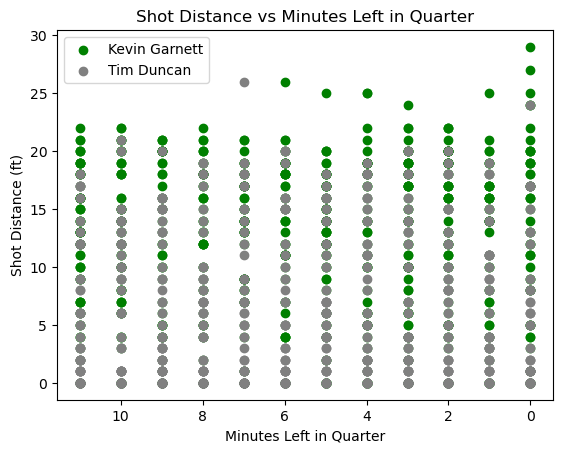

Kevin Garnett Correlation Value :  0.016958263841355875
Tim Duncan Correlation Value :  0.01570434534611621


In [199]:
plt.scatter(kevin_2004['MINS_LEFT'], kevin_2004['SHOT_DISTANCE'], color='green', label='Kevin Garnett')
plt.scatter(tim_2004['MINS_LEFT'], tim_2004['SHOT_DISTANCE'], color='grey', label='Tim Duncan')
plt.gca().invert_xaxis()

plt.xlabel('Minutes Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Minutes Left in Quarter')
plt.legend()
plt.show()
kevin_corr = kevin_2004['MINS_LEFT'].corr(kevin_2004['SHOT_DISTANCE'])
tim_corr = tim_2004['MINS_LEFT'].corr(tim_2004['SHOT_DISTANCE'])
print("Kevin Garnett Correlation Value : ", kevin_corr)
print("Tim Duncan Correlation Value : ", tim_corr)



This is comparison chart is showing that both players tend to not change their shot distance as the quarter gets closer to ending. Towards the end there is a slight positive correlation, however it is mostly neutral. This is still an important find however as this could be an explanation on why these two players were MVP calibar players since their shot choices stays consistant. Both correlation values are very slightly negative however are close to zero, therefore these variables don't have too much of a correlation. The next scatter plot that will be created is these two players compared to the rest of the NBA.

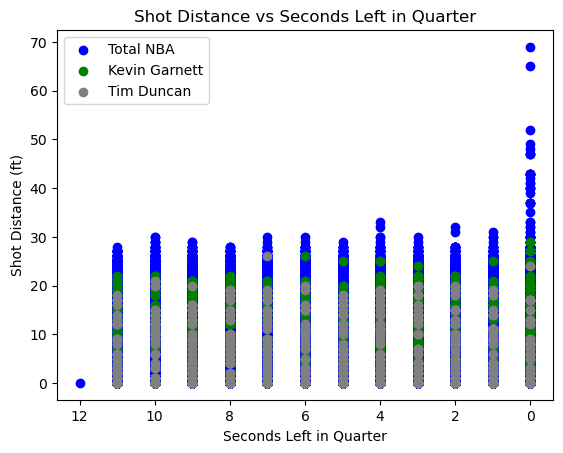

Kevin Garnett Correlation Value :  0.016958263841355875
Tim Duncan Correlation Value :  0.01570434534611621
NBA Correlation Value :  0.00434811248405962


In [27]:

plt.scatter(shot_2004['MINS_LEFT'], shot_2004['SHOT_DISTANCE'], color='blue', label='Total NBA')
plt.scatter(kevin_2004['MINS_LEFT'], kevin_2004['SHOT_DISTANCE'], color='green', label='Kevin Garnett')
plt.scatter(tim_2004['MINS_LEFT'], tim_2004['SHOT_DISTANCE'], color='grey', label='Tim Duncan')
plt.gca().invert_xaxis()

plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')
plt.legend()
plt.show()

kevin_corr = kevin_2004['MINS_LEFT'].corr(kevin_2004['SHOT_DISTANCE'])
tim_corr = tim_2004['MINS_LEFT'].corr(tim_2004['SHOT_DISTANCE'])
nba_corr = shot_2004['MINS_LEFT'].corr(shot_2004['SHOT_DISTANCE'])
print("Kevin Garnett Correlation Value : ", kevin_corr)
print("Tim Duncan Correlation Value : ", tim_corr)
print("NBA Correlation Value : ", nba_corr)

As you can see here, there is a very strong spike towards the end of the quarter as a majority of players shot distances start to increase. This could show that during this year, players who stayed consistant and shot closer to the basket had more respect from the MVP selection comittee than those who shot far away from the basket. There is a stronger negative correlation from the NBA as a whole meaning that as the time goes down in the clock, the shot distance slightly decreases. However, it is still close to zero so there isn not a  Next, hypothesis testing will be conducted.

### Hypothesis Testing

After conducting all this research of multiple seasons, a hypothesis is formed that the MVP award committee values clutch scoring the most when it comes to choosing a winner. In order to test this, we will divide up the data into the top five MVP finshers clutch scoring and the rest of the NBA clutch scoring to see the difference.

The null hypothesis would be : There is no difference in the committess selection when it comes to clutch shots. 
The alternative hypothesis would be : There is a difference in how the committee views palayers who makes clutch shots and those who do not. 



Average Quarter shot was made in for Top Five MVP: 2.3708006279434852
Average Quarter shot was made in for rest of NBA: 2.450181091544898
Average minutes left in fourth quarter for Top Five MVP: 5.155228758169935
Average minutes left in fourth quarter for rest of NBA: 5.346427788735481


<function matplotlib.pyplot.show(close=None, block=None)>

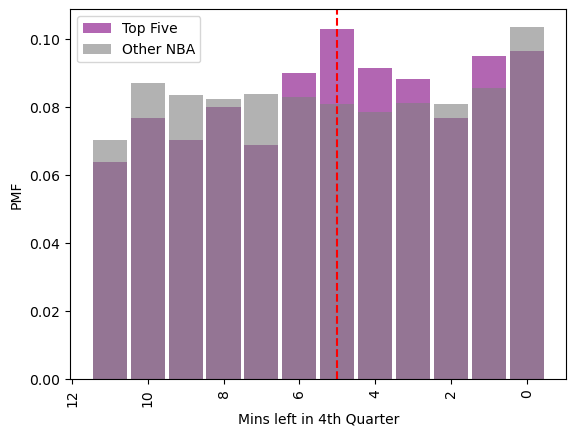

In [31]:
top_five_players = ["Kevin Garnett","Tim Duncan","Jermaine O'Neal","Peja Stojakovic","Kobe Bryant"]
top_five_2004 = shot_2004[shot_2004['PLAYER_NAME'].isin(top_five_players)] 
other_nba_2004 = shot_2004[~shot_2004['PLAYER_NAME'].isin(top_five_players)] ## Every other NBA player but top five

top_five_2004_clutch = top_five_2004[(top_five_2004['QUARTER'] == 4)]
other_nba_clutch = other_nba_2004[(other_nba_2004['QUARTER'] == 4)]

print("Average Quarter shot was made in for Top Five MVP:", top_five_2004['QUARTER'].mean())
print("Average Quarter shot was made in for rest of NBA:", other_nba_2004['QUARTER'].mean())

print("Average minutes left in fourth quarter for Top Five MVP:", top_five_2004_clutch['MINS_LEFT'].mean())
print("Average minutes left in fourth quarter for rest of NBA:", other_nba_clutch['MINS_LEFT'].mean())

top_five_2004_clutch_pmf = thinkstats2.Pmf(top_five_2004_clutch['MINS_LEFT'], label='Top Five')
other_nba_clutch_pmf = thinkstats2.Pmf(other_nba_clutch['MINS_LEFT'], label = 'Other NBA')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(top_five_2004_clutch_pmf, color = "purple")
thinkplot.Hist(other_nba_clutch_pmf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="PMF")


plt.xticks(rotation=90)
plt.show


In [32]:
import scipy.stats as stats


t_test, p_value = stats.ttest_ind(top_five_2004['QUARTER'], other_nba_2004['QUARTER'])

print('T-statistics = ', t_test)
print('p-value = ', p_value)

T-statistics =  -3.8770858947728484
p-value =  0.0001057961353072251


After performing these two tests, it can be concluded that for this season the null hypothesis can be rejected since the p-value is less than .05. Also, the t-statistic shows us the the average minutes left in the fourth quarter for the top five mvp finalists is less than the rest of the NBA. This reinenforces the fact that the commitee favors players who make clutch shots. 

### Regression analysis
This study will now perform a regression analysis between the star players and their ability to perform well in clutch situations. 

In [35]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [203]:
inter, slope = LeastSquares(kevin_2004['MINS_LEFT'], kevin_2004['SHOT_DISTANCE'])
print("Intercept :", inter)
print("Slope :", slope)


Intercept : 9.29673223759848
Slope : 0.03784791129477118


In [37]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [38]:
fit_xs, fit_ys = FitLine(kevin_2004['MINS_LEFT'], inter, slope)


Text(0.5, 1.0, 'Shot Distance vs Minutes Left in Quarter')

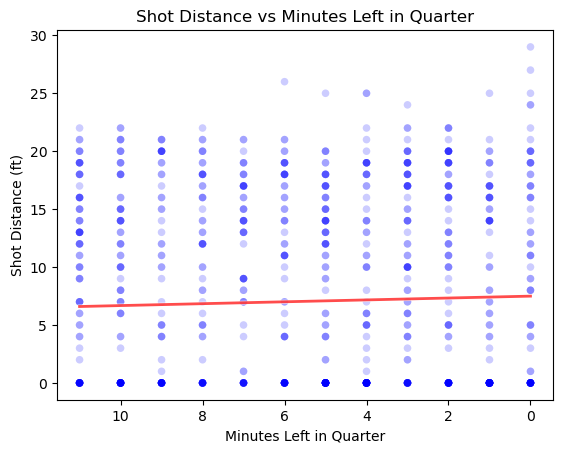

In [201]:
thinkplot.Scatter(kevin_2004['MINS_LEFT'], kevin_2004['SHOT_DISTANCE'], color='blue')
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)

plt.gca().invert_xaxis()

plt.xlabel('Minutes Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Minutes Left in Quarter')


# 2014 Season - MVP Kevin Durant
#### Histogram and Descriptive Statistics

After the data has been imported, we will now go through year by year to analzye individually. Starting with the 2013-2014 season with the winner of the MVP award being Kevin Durant (KD) this season. The way that the award is given is that a board of sportswriters and broadcasters vote for their top five choices. After all the votes are collected, the player with the most points will be deemed the Most Valuable Player of that season.

Therefore, it is important to note the difference of votes between first place and the runner up. The MVP winner Kevin Garnett received 1232 total points and the runner-up, Lebron James, received 891. Therefore, the point differential was 341 points which is less than the 2003-2004 MVP race so the race for this season was closer than before. 

KD Highest Shot Type Occurance : 0    Jump Shot
Name: ACTION_TYPE, dtype: object
Lebron Highest Shot Type Occurance : 0    Jump Shot
Name: ACTION_TYPE, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

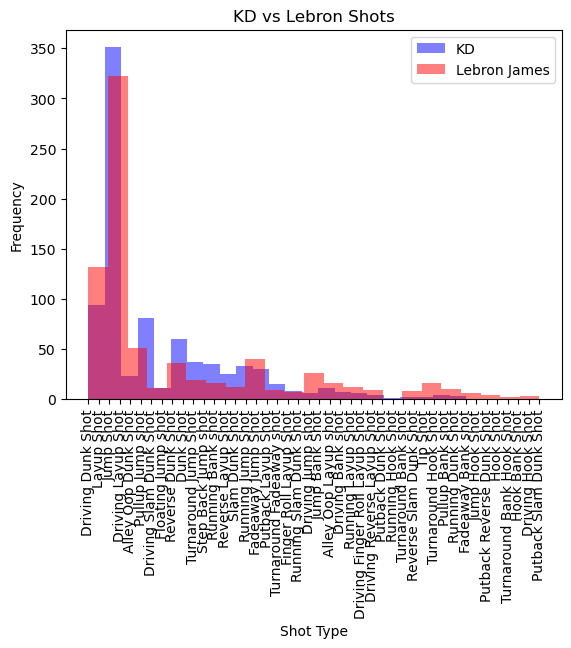

In [42]:
kd_2014 = shot_2014[shot_2014['PLAYER_NAME'] == 'Kevin Durant']
lebron_2014 = shot_2014[shot_2014['PLAYER_NAME'] == 'LeBron James']


## Action_Type
import matplotlib.pyplot as plt
plt.hist(kd_2014['ACTION_TYPE'], label = "KD", bins=23, color="blue", alpha = 0.5)
plt.hist(lebron_2014['ACTION_TYPE'], label = "Lebron James", bins=23, color="red", alpha = 0.5)

print("KD Highest Shot Type Occurance :", kd_2014['ACTION_TYPE'].mode())
print("Lebron Highest Shot Type Occurance :", lebron_2014['ACTION_TYPE'].mode())

plt.xticks(rotation=90)
plt.title('KD vs Lebron Shots')
plt.xlabel('Shot Type')
plt.ylabel('Frequency')

plt.legend()
plt.show



KD Average Shot Distance (ft) : 10.910482921083627
KD Most Common Shot Distance (ft) : 0    0
Name: SHOT_DISTANCE, dtype: int64
Lebron Average Shot Distance (ft) : 7.563233376792699
Lebron Most Common Shot Distance (ft) : 0    1
Name: SHOT_DISTANCE, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

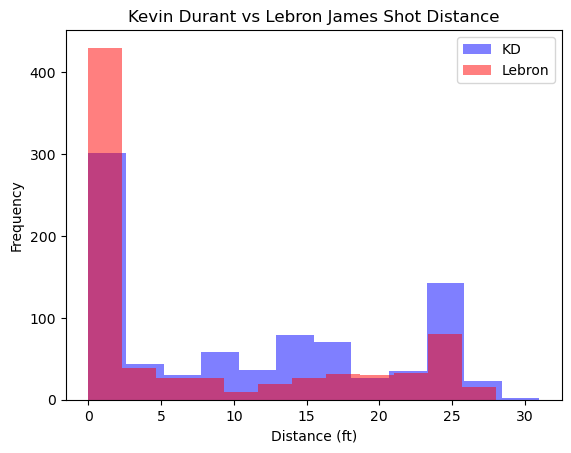

In [43]:
## Shot Distance

plt.hist(kd_2014['SHOT_DISTANCE'], bins=12,label = "KD", alpha=0.5, color="blue")
plt.hist(lebron_2014['SHOT_DISTANCE'], bins=12,label = "Lebron", alpha=0.5, color="red")
print("KD Average Shot Distance (ft) :", kd_2014['SHOT_DISTANCE'].mean())
print("KD Most Common Shot Distance (ft) :", kd_2014['SHOT_DISTANCE'].mode())
print("Lebron Average Shot Distance (ft) :", lebron_2014['SHOT_DISTANCE'].mean())
print("Lebron Most Common Shot Distance (ft) :", lebron_2014['SHOT_DISTANCE'].mode())
plt.xticks(rotation=0)
plt.title('Kevin Durant vs Lebron James Shot Distance')
plt.xlabel('Distance (ft)')
plt.ylabel('Frequency')
plt.legend()
plt.show


KD Most Common Shot Location : 0    Restricted Area
Name: BASIC_ZONE, dtype: object
Lebron Most Common Shot Location : 0    Restricted Area
Name: BASIC_ZONE, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

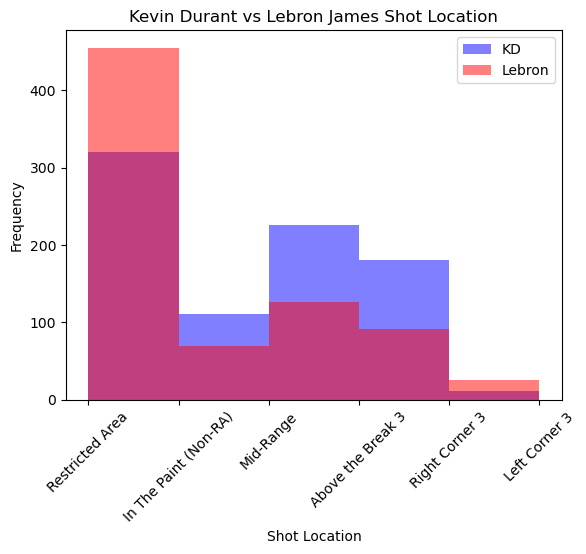

In [44]:
## Basic_Zone
plt.hist(kd_2014['BASIC_ZONE'], bins=5,label = "KD", alpha = 0.5, color="blue")
plt.hist(lebron_2014['BASIC_ZONE'], bins=5,label = "Lebron", alpha = 0.5, color="red")
print("KD Most Common Shot Location :", kd_2014['BASIC_ZONE'].mode())
print("Lebron Most Common Shot Location :", lebron_2014['BASIC_ZONE'].mode())
plt.xticks(rotation=45)
plt.title('Kevin Durant vs Lebron James Shot Location')
plt.xlabel('Shot Location')
plt.ylabel('Frequency')
plt.legend()
plt.show


KD Most Shots in Quarter : 0    1
Name: QUARTER, dtype: int64
Lebron Most Shots in Quarter : 0    1
Name: QUARTER, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

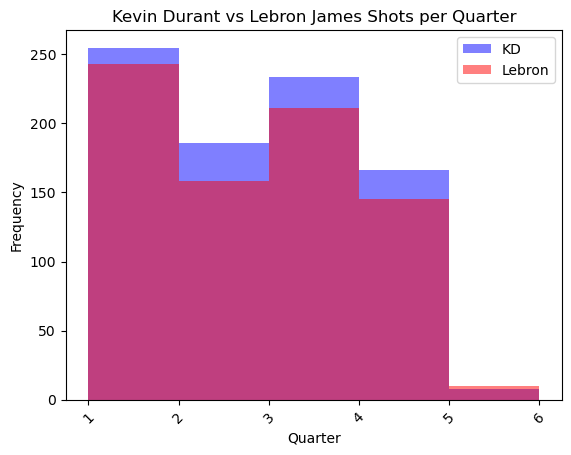

In [45]:
## Quarter
plt.hist(kd_2014['QUARTER'], bins=5, label="KD", alpha=0.5, color="blue")
plt.hist(lebron_2014['QUARTER'], bins=5,label="Lebron", alpha=0.5, color="red")
print("KD Most Shots in Quarter :", kd_2014['QUARTER'].mode())
print("Lebron Most Shots in Quarter :", lebron_2014['QUARTER'].mode())
plt.xticks(rotation=45)
plt.title('Kevin Durant vs Lebron James Shots per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.show


KD Average Shot Made in Fourth Quarter : 2.396937573616019
Lebron Average Shot Made in Fourth Quarter : 2.376792698826597


<function matplotlib.pyplot.show(close=None, block=None)>

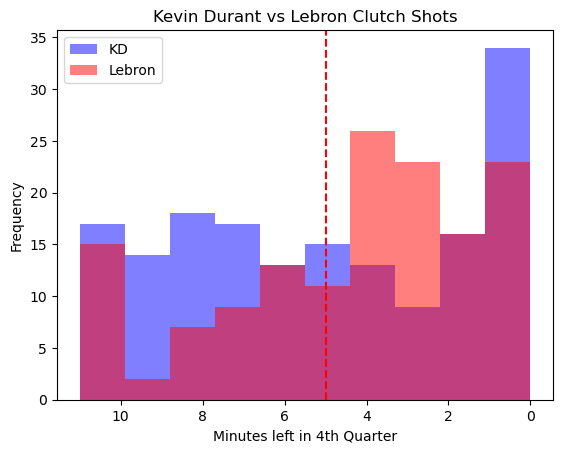

In [46]:
## Clutch Baskets
kd_clutch = kd_2014[(kd_2014['QUARTER'] == 4)]
lebron_clutch = lebron_2014[(lebron_2014['QUARTER'] == 4)]
plt.hist(kd_clutch['MINS_LEFT'], bins = 10, color="blue", alpha = 0.5, label = "KD")
plt.hist(lebron_clutch['MINS_LEFT'], bins = 10, color="red", alpha = 0.5, label = "Lebron")
plt.gca().invert_xaxis()
print("KD Average Shot Made in Fourth Quarter :", kd_2014['QUARTER'].mean())
print("Lebron Average Shot Made in Fourth Quarter :", lebron_2014['QUARTER'].mean())
plt.axvline(x=5, color='r', linestyle='--')
plt.title('Kevin Durant vs Lebron Clutch Shots')
plt.xlabel('Minutes left in 4th Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.show

### PMF Comparison
After analyzing all of this data and understanding the spread within different columns, we can now get to comparing the data from the MVP to the runner up to see what the true differences are. The runner up for the 2013-2014 MVP race was Lebron James

<function matplotlib.pyplot.show(close=None, block=None)>

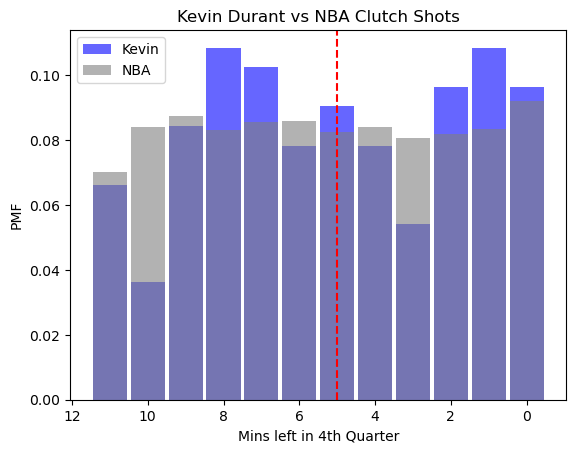

In [217]:
nba_clutch = shot_2014[(shot_2014['QUARTER'] == 4)]

nba_clutch_pmf = thinkstats2.Pmf(nba_clutch['MINS_LEFT'], label='NBA')
kd_clutch_pmf = thinkstats2.Pmf(kd_clutch['MINS_LEFT'], label = 'Kevin')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(kd_clutch_pmf, color = "blue")
thinkplot.Hist(nba_clutch_pmf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="PMF")
plt.title('Kevin Durant vs NBA Clutch Shots')
plt.legend()


plt.show

### CDF Comparison

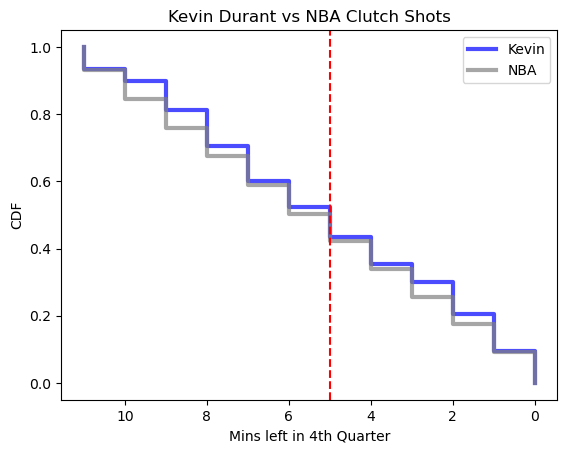

In [225]:
kd_clutch_cdf = thinkstats2.Cdf(kd_clutch['MINS_LEFT'], label = 'Kevin')
nba_clutch_cdf = thinkstats2.Cdf(nba_clutch['MINS_LEFT'], label = 'NBA')
thinkplot.Cdf(kd_clutch_cdf, color = "blue")
thinkplot.Cdf(nba_clutch_cdf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="CDF")
plt.title('Kevin Durant vs NBA Clutch Shots')
plt.legend()

By evaluating both the CDF and PMF for the clutch points, it can be seen that there is a clear difference between the MVP winner Kevin Durant and the NBA. Both show that Kevin seems to hit more shots at the end of the game than the rest of the NBA. 

### Analytical Distribution 
The goal of this section is to further analyze data using an analytical distribution. A normal probability plot will be created from the Quarter variable which will tell us how many standard deviations away the shots made in each quarter are from the mean. For context, there are four quarters in a game usually, however in some games when the score is tied after the completion of the fourth quarter, an extra quarter of play is played which is represented here by the 4.5 and 5.0 quarters.

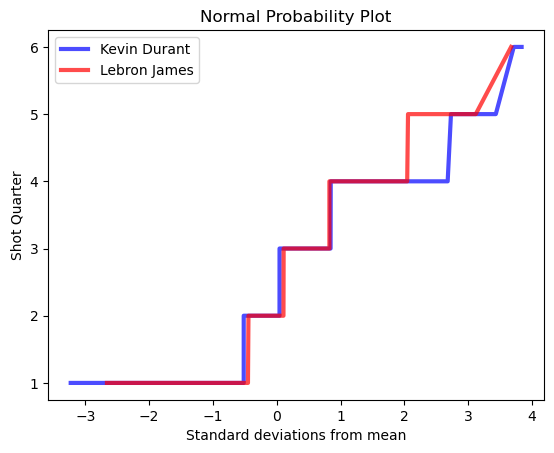

In [230]:
thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(kd_2014['QUARTER'])
thinkplot.Plot(xs, ys, label="Kevin Durant", color = 'blue')

xs, ys = thinkstats2.NormalProbability(lebron_2014['QUARTER'])
thinkplot.Plot(xs, ys, label="Lebron James", color = 'red')

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Shot Quarter",
)
plt.title('Normal Probability Plot')
plt.legend()

This graph is showing that both Kevin Durant and Lebron James make a majority of their shots in the 3rd quarter of the game. However, it does look like Kevin Durant 4th quarter shots are closer to the mean than Lebron James, which compliments the previous study that was done to compare clutch shots between the two players.

### Scatter Plot Comparison
In this section two scatter plots will be used to compare two different sets of varaibles to determine any correlation between the two. In this first correlation plot, the shot distance variable will be compared to the seconds left in quarter. This comparison is being made with the goal of determining how each player changes their game and shot choices as the quarter is coming to a close. 

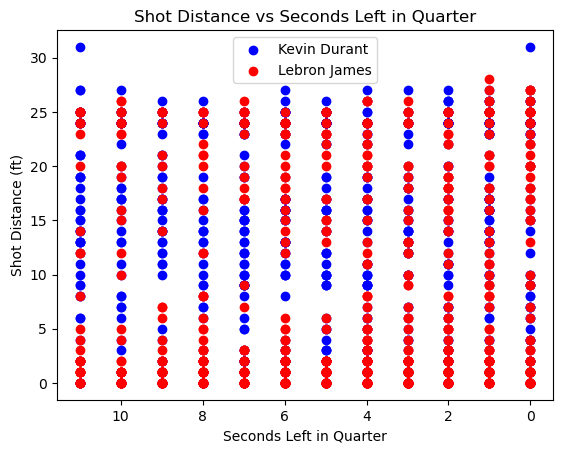

Kevin Durant Correlation Value :  0.03806554624887895
Lebron James Correlation Value :  -0.015908320325445216


In [57]:
plt.scatter(kd_2014['MINS_LEFT'], kd_2014['SHOT_DISTANCE'], color='blue', label='Kevin Durant')
plt.scatter(lebron_2014['MINS_LEFT'], lebron_2014['SHOT_DISTANCE'], color='red', label='Lebron James')
plt.gca().invert_xaxis()
plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')
plt.legend()
plt.show()
kd_corr = kd_2014['MINS_LEFT'].corr(kd_2014['SHOT_DISTANCE'])
lebron_corr = lebron_2014['MINS_LEFT'].corr(lebron_2014['SHOT_DISTANCE'])
print("Kevin Durant Correlation Value : ", kd_corr)
print("Lebron James Correlation Value : ", lebron_corr)



This is comparison chart is showing that both players tend to not change their shot distance as the quarter gets closer to ending. Towards the end there is a slight positive correlation, however it is mostly neutral. This is still an important find however as this could be an explanation on why these two players were MVP calibar players since their shot choices stays consistant. Both correlation values are very slightly negative however are close to zero, therefore these variables don't have too much of a correlation. The next scatter plot that will be created is these two players compared to the rest of the NBA.

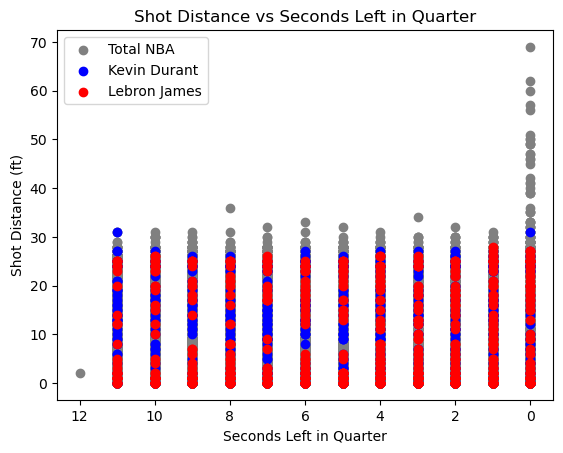

Kevin Durant Correlation Value :  0.03806554624887895
Lebron James Correlation Value :  -0.015908320325445216
NBA Correlation Value :  0.01277365259500207


In [59]:
plt.scatter(shot_2014['MINS_LEFT'], shot_2014['SHOT_DISTANCE'], color='grey', label='Total NBA')
plt.scatter(kd_2014['MINS_LEFT'], kd_2014['SHOT_DISTANCE'], color='blue', label='Kevin Durant')
plt.scatter(lebron_2014['MINS_LEFT'], lebron_2014['SHOT_DISTANCE'], color='red', label='Lebron James')
plt.gca().invert_xaxis()

plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')
plt.legend()
plt.show()

kd_corr = kd_2014['MINS_LEFT'].corr(kd_2014['SHOT_DISTANCE'])
lebron_corr = lebron_2014['MINS_LEFT'].corr(lebron_2014['SHOT_DISTANCE'])
nba_corr = shot_2014['MINS_LEFT'].corr(shot_2014['SHOT_DISTANCE'])
print("Kevin Durant Correlation Value : ", kd_corr)
print("Lebron James Correlation Value : ", lebron_corr)
print("NBA Correlation Value : ", nba_corr)

As you can see here, there is a very strong spike towards the end of the quarter as a majority of players shot distances start to increase. This could show that during this year, players who stayed consistant and shot closer to the basket had more respect from the MVP selection comittee than those who shot far away from the basket. There is a stronger negative correlation from the NBA as a whole meaning that as the time goes down in the clock, the shot distance slightly decreases. However, it is still close to zero so there is not a strong correlation either way. Next, hypothesis testing will be conducted.

### Hypothesis Testing

After conducting all this research of multiple seasons, a hypothesis is formed that the MVP award committee values clutch scoring the most when it comes to choosing a winner. In order to test this, we will divide up the data into the top five MVP finshers clutch scoring and the rest of the NBA clutch scoring to see the difference.

The null hypothesis would be : There is no difference in the committess selection when it comes to clutch shots. 
The alternative hypothesis would be : There is a difference in how the committee views palayers who makes clutch shots and those who do not. 



Average Quarter shot was made in for Top Five MVP: 2.4014423076923075
Average Quarter shot was made in for rest of NBA: 2.464329234518666
Average minutes left in fourth quarter for Top Five MVP: 5.063008130081301
Average minutes left in fourth quarter for rest of NBA: 5.420482215325854


<function matplotlib.pyplot.show(close=None, block=None)>

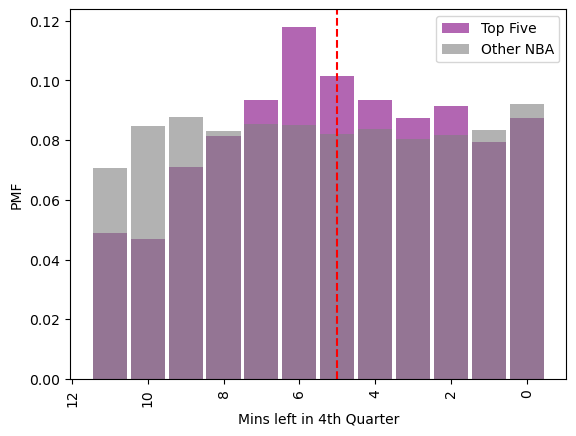

In [253]:
top_five_players = ["Kevin Durant","Lebron James","Blake Griffin","Joakim Noah","James Harden"]
top_five_2014 = shot_2014[shot_2014['PLAYER_NAME'].isin(top_five_players)] 
other_nba_2014 = shot_2014[~shot_2014['PLAYER_NAME'].isin(top_five_players)] ## Every other NBA player but top five

top_five_2014_clutch = top_five_2014[(top_five_2014['QUARTER'] == 4)]
other_nba_clutch = other_nba_2014[(other_nba_2014['QUARTER'] == 4)]

print("Average Quarter shot was made in for Top Five MVP:", top_five_2014['QUARTER'].mean())
print("Average Quarter shot was made in for rest of NBA:", other_nba_2014['QUARTER'].mean())

print("Average minutes left in fourth quarter for Top Five MVP:", top_five_2014_clutch['MINS_LEFT'].mean())
print("Average minutes left in fourth quarter for rest of NBA:", other_nba_clutch['MINS_LEFT'].mean())

top_five_2014_clutch_pmf = thinkstats2.Pmf(top_five_2014_clutch['MINS_LEFT'], label='Top Five')
other_nba_clutch_pmf = thinkstats2.Pmf(other_nba_clutch['MINS_LEFT'], label = 'Other NBA')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(top_five_2014_clutch_pmf, color = "purple")
thinkplot.Hist(other_nba_clutch_pmf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="PMF")

plt.legend()
plt.xticks(rotation=90)
plt.show


In [64]:
import scipy.stats as stats


t_test, p_value = stats.ttest_ind(top_five_2014['QUARTER'], other_nba_2014['QUARTER'])

print('T-statistics = ', t_test)
print('p-value = ', p_value)

T-statistics =  -2.720961104321195
p-value =  0.006510455471716963


After performing these two tests, it can be concluded that for this season the null hypothesis can be rejected since the p-value is less than .05. Also, the t-statistic shows us the the average minutes left in the fourth quarter for the top five mvp finalists is less than the rest of the NBA. This reinenforces the fact that the commitee favors players who make clutch shots. 

### Regression analysis
This study will now perform a regression analysis between the star players and their ability to perform well in clutch situations. 

In [67]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [232]:
inter, slope = LeastSquares(kd_2014['MINS_LEFT'], kd_2014['SHOT_DISTANCE'])
print("Intercept :",inter)
print("Slope:", slope)

Intercept : 10.384825922997873
Slope: 0.10876987359853904


In [69]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [70]:
fit_xs, fit_ys = FitLine(kd_2014['MINS_LEFT'], inter, slope)


Text(0.5, 1.0, 'Shot Distance vs Seconds Left in Quarter')

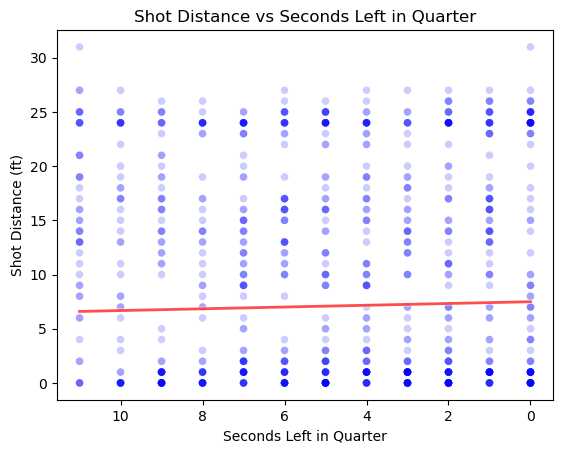

In [172]:
thinkplot.Scatter(kd_2014['MINS_LEFT'], kd_2014['SHOT_DISTANCE'], color='blue')
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
plt.gca().invert_xaxis()

plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')


# 2024 Season - MVP Nikola Jokic
#### Histogram and Descriptive Statistics

After the data has been imported, we will now go through year by year to analzye individually. Starting with the 2013-2014 season with the winner of the MVP award being Nikola Jokic this season. The way that the award is given is that a board of sportswriters and broadcasters vote for their top five choices. After all the votes are collected, the player with the most points will be deemed the Most Valuable Player of that season.

Therefore, it is important to note the difference of votes between first place and the runner up. The MVP winner Nikola Jokic received 926 total points and the runner-up, Shai Gilgeous-Alexander (SGA), received 640. Therefore, the point differential was 286 points which is least amount of different between all seasons so this was the closest race in this study. 

Jokic Highest Shot Type Occurance : 0    Jump Shot
Name: ACTION_TYPE, dtype: object
SGA Highest Shot Type Occurance : 0    Pullup Jump shot
Name: ACTION_TYPE, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

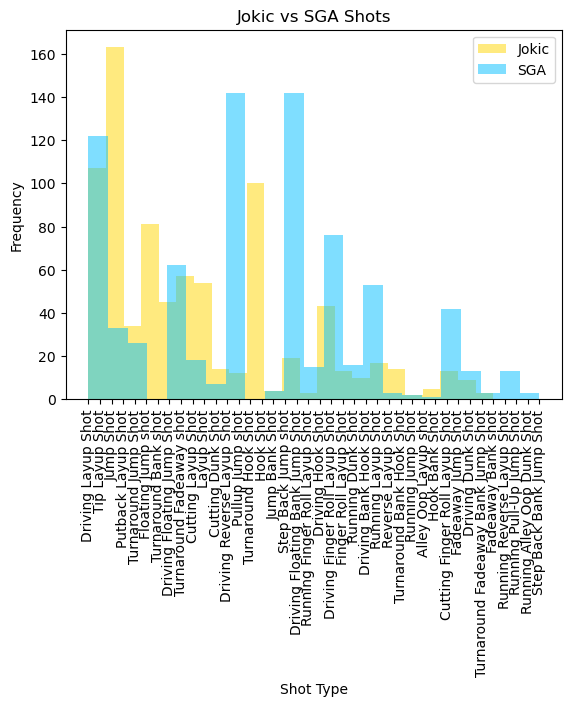

In [74]:
jokic_2024 = shot_2024[shot_2024['PLAYER_NAME'] == 'Nikola Jokic']
sga_2024 = shot_2024[shot_2024['PLAYER_NAME'] == 'Shai Gilgeous-Alexander']


## Action_Type
import matplotlib.pyplot as plt
plt.hist(jokic_2024['ACTION_TYPE'], label = "Jokic", bins=23, color="gold", alpha = 0.5)
plt.hist(sga_2024['ACTION_TYPE'], label = "SGA", bins=23, color="deepskyblue", alpha = 0.5)

print("Jokic Highest Shot Type Occurance :", jokic_2024['ACTION_TYPE'].mode())
print("SGA Highest Shot Type Occurance :", sga_2024['ACTION_TYPE'].mode())

plt.xticks(rotation=90)
plt.title('Jokic vs SGA Shots')
plt.xlabel('Shot Type')
plt.ylabel('Frequency')

plt.legend()
plt.show



Jokic Average Shot Distance (ft) : 7.108272506082725
Jokic Most Common Shot Distance (ft) : 0    2
Name: SHOT_DISTANCE, dtype: int64
SGA Average Shot Distance (ft) : 8.976130653266331
SGA Most Common Shot Distance (ft) : 0    1
Name: SHOT_DISTANCE, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

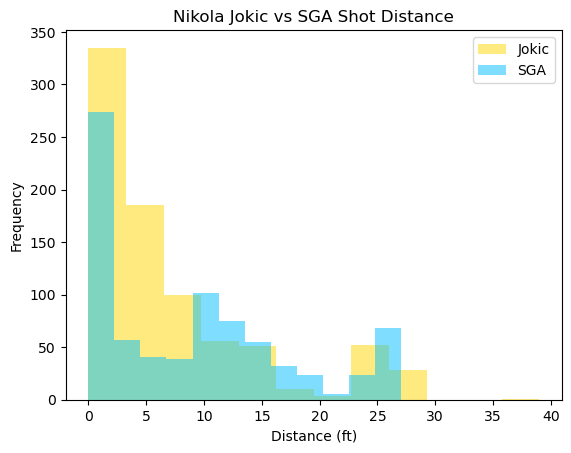

In [75]:
## Shot Distance

plt.hist(jokic_2024['SHOT_DISTANCE'], bins=12,label = "Jokic", alpha=0.5, color="gold")
plt.hist(sga_2024['SHOT_DISTANCE'], bins=12,label = "SGA", alpha=0.5, color="deepskyblue")
print("Jokic Average Shot Distance (ft) :", jokic_2024['SHOT_DISTANCE'].mean())
print("Jokic Most Common Shot Distance (ft) :", jokic_2024['SHOT_DISTANCE'].mode())
print("SGA Average Shot Distance (ft) :", sga_2024['SHOT_DISTANCE'].mean())
print("SGA Most Common Shot Distance (ft) :", sga_2024['SHOT_DISTANCE'].mode())
plt.xticks(rotation=0)
plt.title('Nikola Jokic vs SGA Shot Distance')
plt.xlabel('Distance (ft)')
plt.ylabel('Frequency')
plt.legend()
plt.show


Jokic Most Common Shot Location : 0    Restricted Area
Name: BASIC_ZONE, dtype: object
sGA Most Common Shot Location : 0    Restricted Area
Name: BASIC_ZONE, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

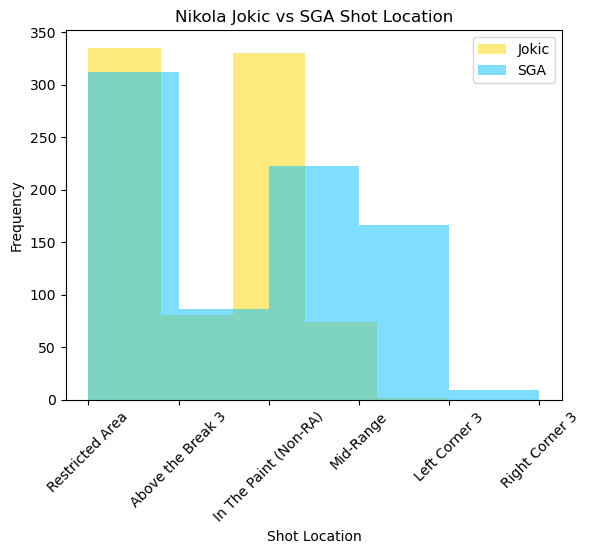

In [76]:
## Basic_Zone
plt.hist(jokic_2024['BASIC_ZONE'], bins=5,label = "Jokic", alpha = 0.5, color="gold")
plt.hist(sga_2024['BASIC_ZONE'], bins=5,label = "SGA", alpha = 0.5, color="deepskyblue")
print("Jokic Most Common Shot Location :", jokic_2024['BASIC_ZONE'].mode())
print("sGA Most Common Shot Location :", sga_2024['BASIC_ZONE'].mode())
plt.xticks(rotation=45)
plt.title('Nikola Jokic vs SGA Shot Location')
plt.xlabel('Shot Location')
plt.ylabel('Frequency')
plt.legend()
plt.show


Jokic Most Shots in Quarter : 0    1
Name: QUARTER, dtype: int64
SGA Most Shots in Quarter : 0    3
Name: QUARTER, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

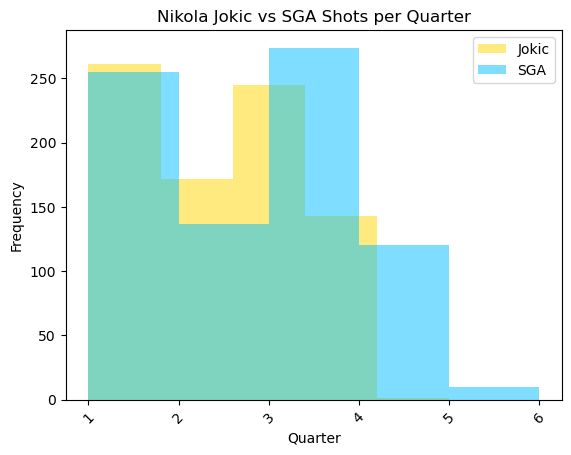

In [77]:
## Quarter
plt.hist(jokic_2024['QUARTER'], bins=5, label="Jokic", alpha=0.5, color="gold")
plt.hist(sga_2024['QUARTER'], bins=5,label="SGA", alpha=0.5, color="deepskyblue")
print("Jokic Most Shots in Quarter :", jokic_2024['QUARTER'].mode())
print("SGA Most Shots in Quarter :", sga_2024['QUARTER'].mode())
plt.xticks(rotation=45)
plt.title('Nikola Jokic vs SGA Shots per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.show


Jokic Average Shot Made in Fourth Quarter : 2.332116788321168
SGA Average Shot Made in Fourth Quarter : 2.364321608040201


<function matplotlib.pyplot.show(close=None, block=None)>

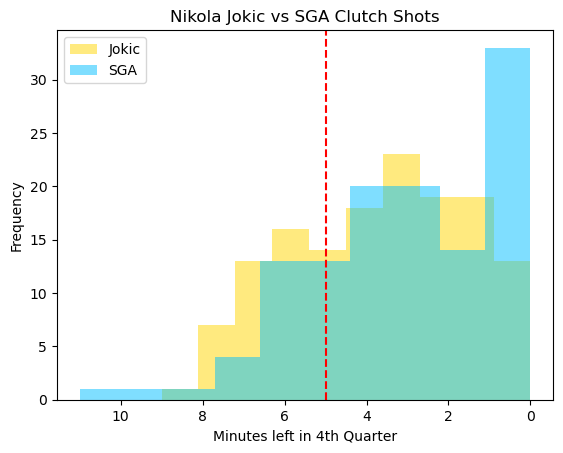

In [78]:
## Clutch Baskets
jokic_clutch = jokic_2024[(jokic_2024['QUARTER'] == 4)]
sga_clutch = sga_2024[(sga_2024['QUARTER'] == 4)]
plt.hist(jokic_clutch['MINS_LEFT'], bins = 10, color="gold", alpha = 0.5, label = "Jokic")
plt.hist(sga_clutch['MINS_LEFT'], bins = 10, color="deepskyblue", alpha = 0.5, label = "SGA")
plt.gca().invert_xaxis()
print("Jokic Average Shot Made in Fourth Quarter :", jokic_2024['QUARTER'].mean())
print("SGA Average Shot Made in Fourth Quarter :", sga_2024['QUARTER'].mean())
plt.axvline(x=5, color='r', linestyle='--')
plt.title('Nikola Jokic vs SGA Clutch Shots')
plt.xlabel('Minutes left in 4th Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.show

### PMF Comparison
After analyzing all of this data and understanding the spread within different columns, we can now get to comparing the data from the MVP to the runner up to see what the true differences are. The runner up for the 2013-2014 MVP race was SGA

<function matplotlib.pyplot.show(close=None, block=None)>

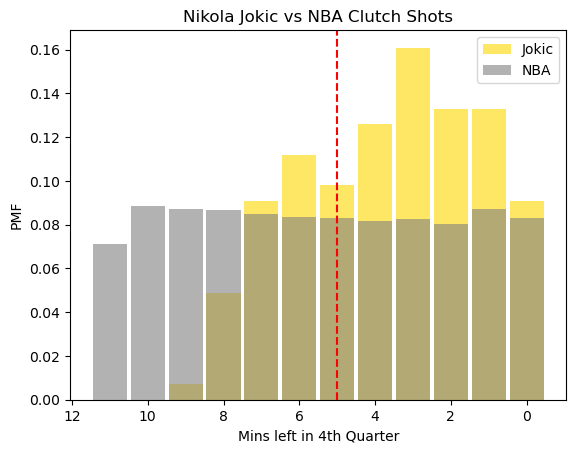

In [241]:
nba_clutch = shot_2024[(shot_2024['QUARTER'] == 4)]

nba_clutch_pmf = thinkstats2.Pmf(nba_clutch['MINS_LEFT'], label='NBA')
jokic_clutch_pmf = thinkstats2.Pmf(jokic_clutch['MINS_LEFT'], label = 'Jokic')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(jokic_clutch_pmf, color = "gold")
thinkplot.Hist(nba_clutch_pmf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="PMF")
plt.title('Nikola Jokic vs NBA Clutch Shots')
plt.legend()


plt.show

### CDF Comparison

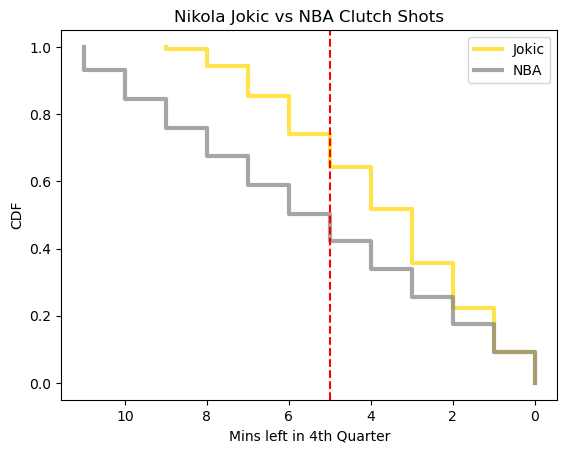

In [245]:
jokic_clutch_cdf = thinkstats2.Cdf(jokic_clutch['MINS_LEFT'], label = 'Jokic')
NBA_clutch_cdf = thinkstats2.Cdf(nba_clutch['MINS_LEFT'], label = 'NBA')
thinkplot.Cdf(jokic_clutch_cdf, color = "gold")
thinkplot.Cdf(nba_clutch_cdf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="CDF")
plt.title('Nikola Jokic vs NBA Clutch Shots')
plt.legend()

By evaluating both the CDF and PMF for the clutch points, it can be seen that there is a clear difference between the MVP winner Nikola Jokic and runner up SGA. Both show that Lebron seems to hit more shots between 4 and 5 minutes left in the game, however when there is 3 minutes left in the game, Nikola Jokic seems to be more clutch. This also gives value to those players who are successful in making shots in clutch games.

### Analytical Distribution 
The goal of this section is to further analyze data using an analytical distribution. A normal probability plot will be created from the Quarter variable which will tell us how many standard deviations away the shots made in each quarter are from the mean. For context, there are four quarters in a game usually, however in some games when the score is tied after the completion of the fourth quarter, an extra quarter of play is played which is represented here by the 4.5 and 5.0 quarters.

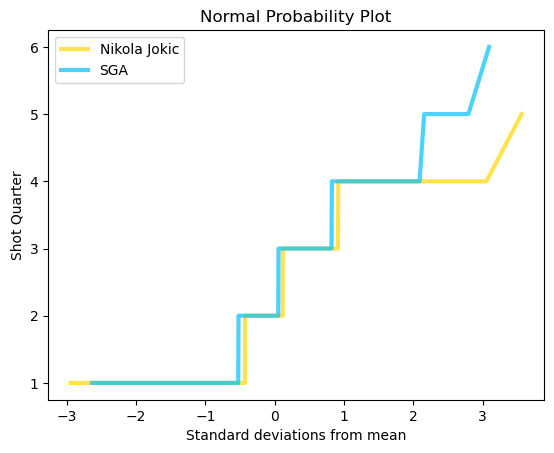

In [249]:
thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(jokic_2024['QUARTER'])
thinkplot.Plot(xs, ys, label="Nikola Jokic", color = 'gold')

xs, ys = thinkstats2.NormalProbability(lebron_2014['QUARTER'])
thinkplot.Plot(xs, ys, label="SGA", color = 'deepskyblue')

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Shot Quarter",
)
plt.title('Normal Probability Plot')
plt.legend()

This graph is showing that both Nikola Jokic and SGA make a majority of their shots in the 3rd quarter of the game. However, it does look like Nikola Jokic 4th quarter shots are closer to the mean than SGA, which compliments the previous study that was done to compare clutch shots between the two players.

### Scatter Plot Comparison
In this section two scatter plots will be used to compare two different sets of varaibles to determine any correlation between the two. In this first correlation plot, the shot distance variable will be compared to the seconds left in quarter. This comparison is being made with the goal of determining how each player changes their game and shot choices as the quarter is coming to a close. 

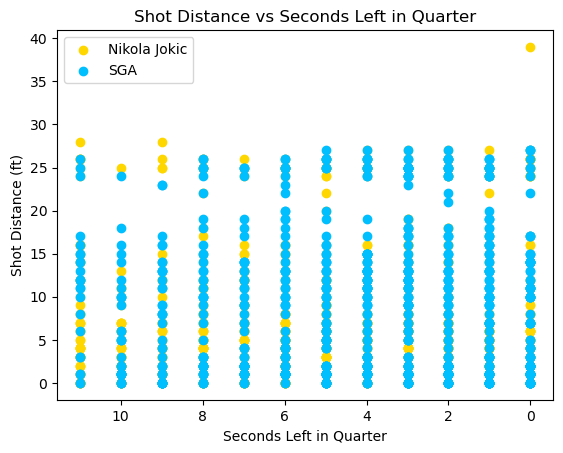

Nikola Jokic Correlation Value :  -0.03488651551195615
SGA Correlation Value :  0.00072137401814187


In [89]:
plt.scatter(jokic_2024['MINS_LEFT'], jokic_2024['SHOT_DISTANCE'], color='gold', label='Nikola Jokic')
plt.scatter(sga_2024['MINS_LEFT'], sga_2024['SHOT_DISTANCE'], color='deepskyblue', label='SGA')
plt.gca().invert_xaxis()
plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')
plt.legend()
plt.show()
jokic_corr = jokic_2024['MINS_LEFT'].corr(jokic_2024['SHOT_DISTANCE'])
sga_corr = sga_2024['MINS_LEFT'].corr(sga_2024['SHOT_DISTANCE'])
print("Nikola Jokic Correlation Value : ", jokic_corr)
print("SGA Correlation Value : ", sga_corr)



This is comparison chart is showing that both players tend to not change their shot distance as the quarter gets closer to ending. Towards the end there is a slight positive correlation, however it is mostly neutral. This is still an important find however as this could be an explanation on why these two players were MVP calibar players since their shot choices stays consistant. Both correlation values are very slightly negative however are close to zero, therefore these variables don't have too much of a correlation. The next scatter plot that will be created is these two players compared to the rest of the NBA.

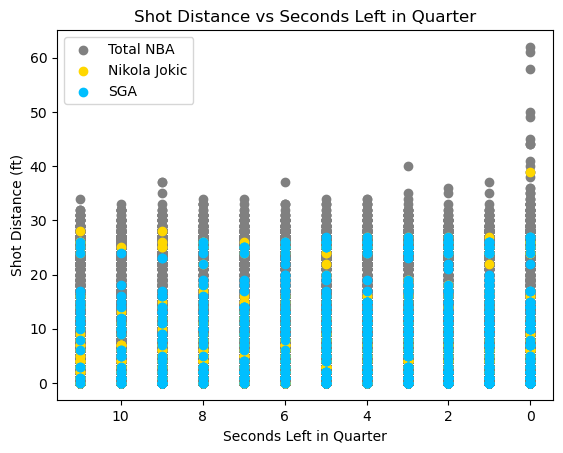

Nikola Jokic Correlation Value :  -0.03488651551195615
SGA Correlation Value :  0.00072137401814187
NBA Correlation Value :  0.0052680174606826715


In [91]:
plt.scatter(shot_2024['MINS_LEFT'], shot_2024['SHOT_DISTANCE'], color='grey', label='Total NBA')
plt.scatter(jokic_2024['MINS_LEFT'], jokic_2024['SHOT_DISTANCE'], color='gold', label='Nikola Jokic')
plt.scatter(sga_2024['MINS_LEFT'], sga_2024['SHOT_DISTANCE'], color='deepskyblue', label='SGA')
plt.gca().invert_xaxis()

plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')
plt.legend()
plt.show()

jokic_corr = jokic_2024['MINS_LEFT'].corr(jokic_2024['SHOT_DISTANCE'])
sga_corr = sga_2024['MINS_LEFT'].corr(sga_2024['SHOT_DISTANCE'])
nba_corr = shot_2024['MINS_LEFT'].corr(shot_2024['SHOT_DISTANCE'])
print("Nikola Jokic Correlation Value : ", jokic_corr)
print("SGA Correlation Value : ", sga_corr)
print("NBA Correlation Value : ", nba_corr)

As you can see here, there is a very strong spike towards the end of the quarter as a majority of players shot distances start to increase. This could show that during this year, players who stayed consistant and shot closer to the basket had more respect from the MVP selection comittee than those who shot far away from the basket. There is a stronger negative correlation from the NBA as a whole meaning that as the time goes down in the clock, the shot distance slightly decreases. However, it is still close to zero so there is not a strong correlation either way. Next, hypothesis testing will be conducted.

### Hypothesis Testing

After conducting all this research of multiple seasons, a hypothesis is formed that the MVP award committee values clutch scoring the most when it comes to choosing a winner. In order to test this, we will divide up the data into the top five MVP finshers clutch scoring and the rest of the NBA clutch scoring to see the difference.

The null hypothesis would be : There is no difference in the committess selection when it comes to clutch shots. 
The alternative hypothesis would be : There is a difference in how the committee views palayers who makes clutch shots and those who do not. 



Average Quarter shot was made in for Top Five MVP: 2.3872561126204
Average Quarter shot was made in for rest of NBA: 2.480068211455512
Average minutes left in fourth quarter for Top Five MVP: 4.43010752688172
Average minutes left in fourth quarter for rest of NBA: 5.5137777777777774


<function matplotlib.pyplot.show(close=None, block=None)>

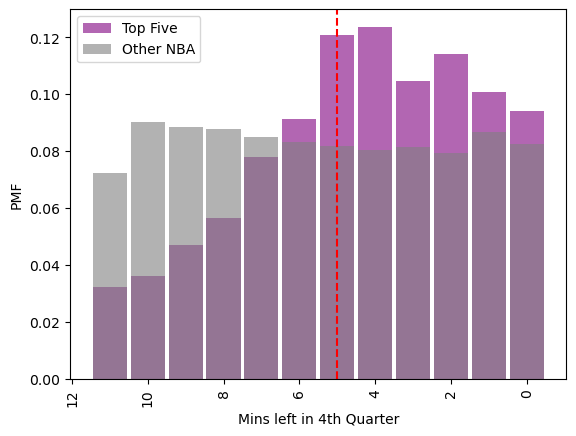

In [255]:
top_five_players = ["Nikola Jokic","Shai Gilgeous-Alexander","Luka Doncic","Giannis Antetokounmpo","Jalen Brunson"]
top_five_2024 = shot_2024[shot_2024['PLAYER_NAME'].isin(top_five_players)] 
other_nba_2024 = shot_2024[~shot_2024['PLAYER_NAME'].isin(top_five_players)] ## Every other NBA player but top five

top_five_2024_clutch = top_five_2024[(top_five_2024['QUARTER'] == 4)]
other_nba_clutch = other_nba_2024[(other_nba_2024['QUARTER'] == 4)]

print("Average Quarter shot was made in for Top Five MVP:", top_five_2024['QUARTER'].mean())
print("Average Quarter shot was made in for rest of NBA:", other_nba_2024['QUARTER'].mean())

print("Average minutes left in fourth quarter for Top Five MVP:", top_five_2024_clutch['MINS_LEFT'].mean())
print("Average minutes left in fourth quarter for rest of NBA:", other_nba_clutch['MINS_LEFT'].mean())

top_five_2024_clutch_pmf = thinkstats2.Pmf(top_five_2024_clutch['MINS_LEFT'], label='Top Five')
other_nba_clutch_pmf = thinkstats2.Pmf(other_nba_clutch['MINS_LEFT'], label = 'Other NBA')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(top_five_2024_clutch_pmf, color = "purple")
thinkplot.Hist(other_nba_clutch_pmf, color = "grey")
plt.gca().invert_xaxis()
plt.axvline(x=5, color='r', linestyle='--')
thinkplot.Config(xlabel="Mins left in 4th Quarter", ylabel="PMF")

plt.legend()
plt.xticks(rotation=90)
plt.show


In [96]:
import scipy.stats as stats


t_test, p_value = stats.ttest_ind(top_five_2024['QUARTER'], other_nba_2024['QUARTER'])

print('T-statistics = ', t_test)
print('p-value = ', p_value)

T-statistics =  -5.140855440850246
p-value =  2.7398546818895304e-07


After performing these two tests, it can be concluded that for this season the null hypothesis can be rejected since the p-value is less than .05. Also, the t-statistic shows us the the average minutes left in the fourth quarter for the top five mvp finalists is less than the rest of the NBA. This reinenforces the fact that the commitee favors players who make clutch shots. 

### Regression analysis
This study will now perform a regression analysis between the star players and their ability to perform well in clutch situations. 

In [99]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [257]:
inter, slope = LeastSquares(jokic_2024['MINS_LEFT'], jokic_2024['SHOT_DISTANCE'])
print("Intercept:", inter)
print("Slope:", slope)

Intercept: 7.490734316692074
Slope: -0.0814676362583272


In [101]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [102]:
fit_xs, fit_ys = FitLine(jokic_2024['MINS_LEFT'], inter, slope)


Text(0.5, 1.0, 'Shot Distance vs Seconds Left in Quarter')

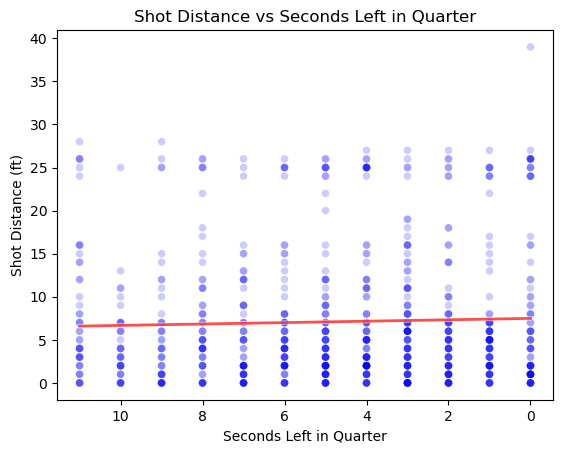

In [170]:
thinkplot.Scatter(jokic_2024['MINS_LEFT'], jokic_2024['SHOT_DISTANCE'], color='blue')
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)

plt.gca().invert_xaxis()

plt.xlabel('Seconds Left in Quarter')
plt.ylabel('Shot Distance (ft)')
plt.title('Shot Distance vs Seconds Left in Quarter')
